# **<center>Give me some credit</center>**

## **Description:**

*Los bancos juegan un papel crucial en las economías de mercado. Ellos deciden quién puede ser financiado y en qué términos, así como hacer y deshacer grandes inversiones. Para que los mercados y las sociedades funcionen, tanto individuos como compañías necesitan acceso a créditos.*

*Los algoritmos de credit scoring son los métodos que los bancos tienen para determinar si un préstamo debe ser concedido o no. Los participantes de esta competición deberán mejorar, mediante los últimos avances obtenidos en el área del Machine Learning, un sistema de credit scoring que sea capaz de predecir la probabilidad de que alguien sufra dificultades financieras en los próximos dos años. *

*El objetivo de esta competición es crear un modelo que las instituciones de crédito puedan utilizar para tratar de tomar las mejores decisiones financieras posibles. *

## ***Carga de Datos***

In [1]:
import pandas as pd

# Cargar el conjunto de entrenamiento
df = pd.read_csv('data/train.csv', index_col=0)

# Cargar el conjunto de prueba
df_test = pd.read_csv('data/test.csv', index_col=0)

# Visualizar las primeras filas
df.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


## ***Limpieza y Preprocesamiento de datos***

In [2]:
# Verificar valores nulos
df.isnull().sum()

# Imputar valores faltantes en 'MonthlyIncome' con la mediana
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# Imputar valores faltantes en 'NumberOfDependents' con 0
df['NumberOfDependents'].fillna(0, inplace=True)

# Corregir valores atípicos en variables de morosidad
for col in ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']:
    df[col] = df[col].replace({96: df[col].median(), 98: df[col].median()})


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_16208\3277090544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_16208\3277090544.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

## ***Análisis Exploratorio de Datos (EDA)***

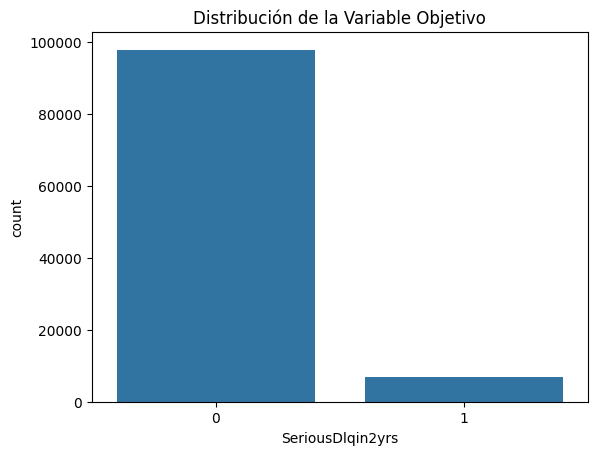

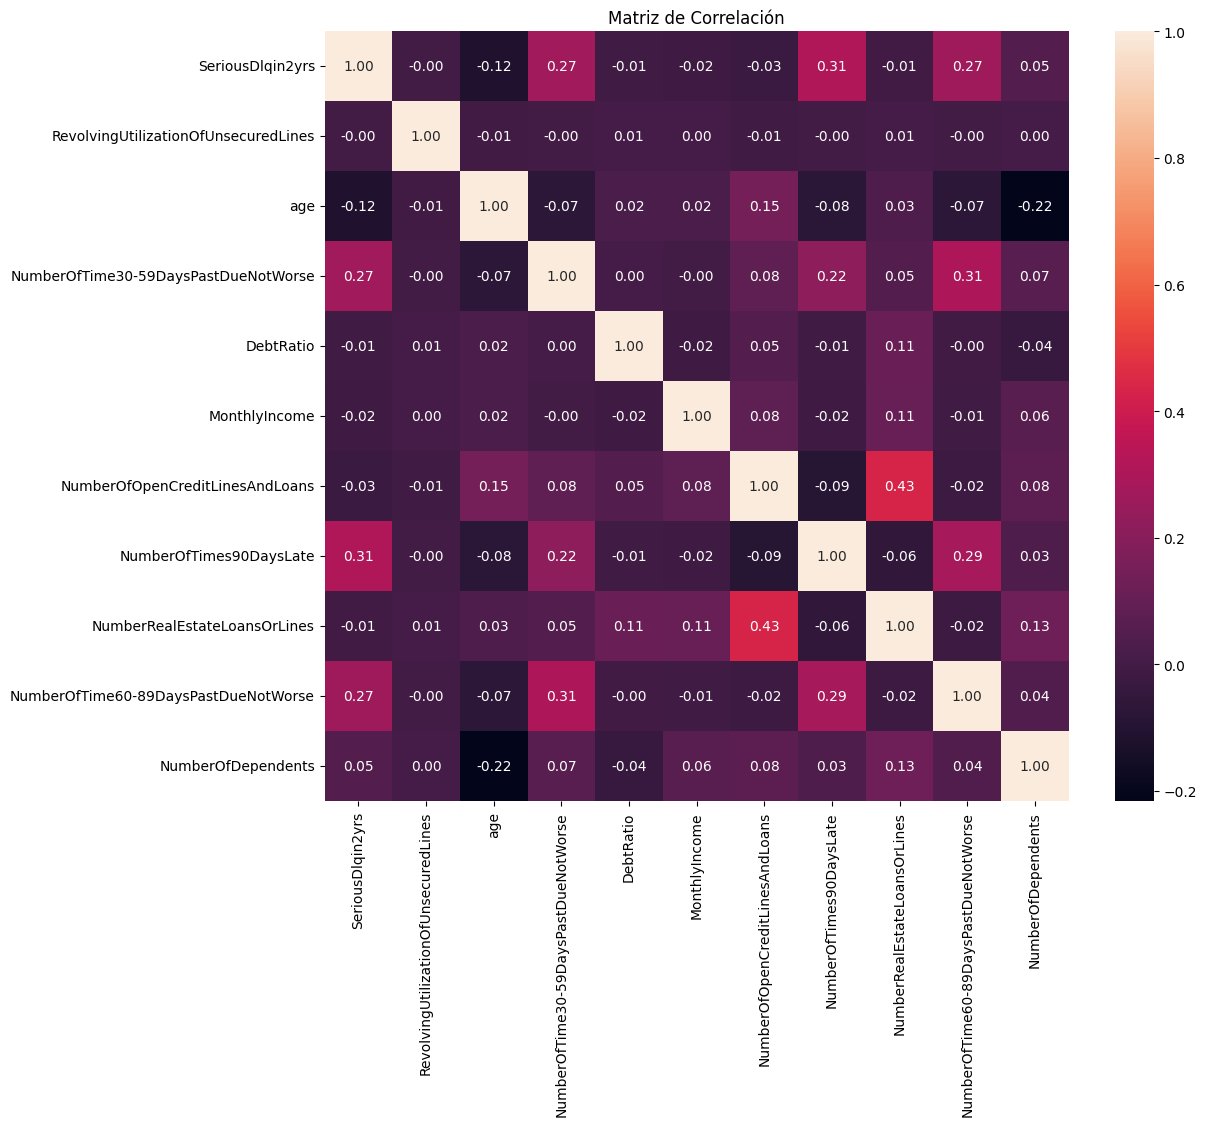

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


## ***Preparación de Datos para el Modelado***

In [4]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## ***Modelado***

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:,1]

# Evaluación
print(classification_report(y_val, y_pred))
print(f"AUC: {roc_auc_score(y_val, y_proba):.4f}")


              precision    recall  f1-score   support

           0       0.94      0.99      0.97     19571
           1       0.51      0.17      0.25      1390

    accuracy                           0.93     20961
   macro avg       0.73      0.58      0.61     20961
weighted avg       0.91      0.93      0.92     20961

AUC: 0.8412


## ***Interpretación de Resultados***

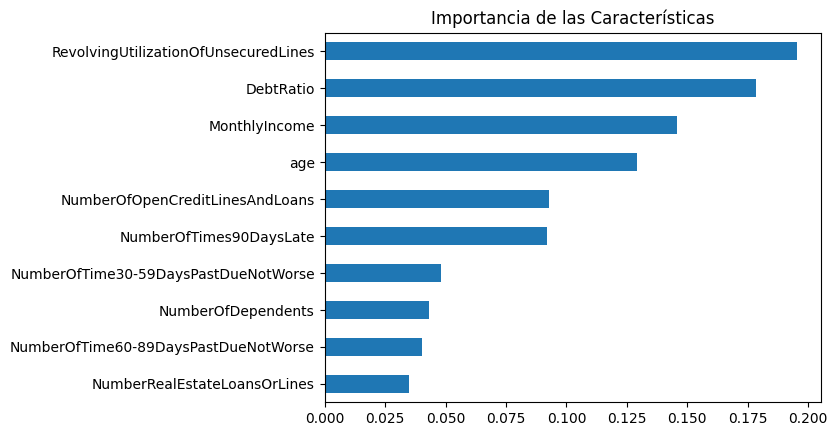

In [6]:
# Importancia de las características
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()
